In [55]:
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [56]:
%cd MyDrive/My\ Drive/ECoG

[Errno 2] No such file or directory: 'MyDrive/My Drive/ECoG'
/content/MyDrive/My Drive/ECoG


In [3]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import ECoG
import pywt
import time
import pandas as pd
import math

In [4]:
x,y = ECoG.read_ECoG_from_csv("ECoG.csv", "Motion.csv")
data = ECoG.ECoG(x, y, downsample = False)

In [5]:
X = data.signal 
y = data.motion 
t = data.time

In [6]:
X.shape, t.shape

((1258379, 32), (1258379,))

In [ ]:
for el in range(data.signal.shape[1]):
    plt.figure(figsize=(14,5))
    plt.plot(data.time[::10000],data.signal[::10000, el])
    plt.title("Electrode "+str(el))
    plt.xlabel("time")
    plt.ylabel("voltage")
    plt.show()

In [7]:
import seaborn as sns

In [8]:
def abs_morlet(M,w = 0.5,s = 0.1):
    return np.abs(scipy.signal.morlet(M,w = 0.5,s = 0.1))

freqs = np.linspace(1,14.5,12)

scalo1 = pywt.cwt(data.signal[25000:65000:100, 2], wavelet='morl', scales=freqs)[0]

In [9]:
scalo1.shape

(12, 400)

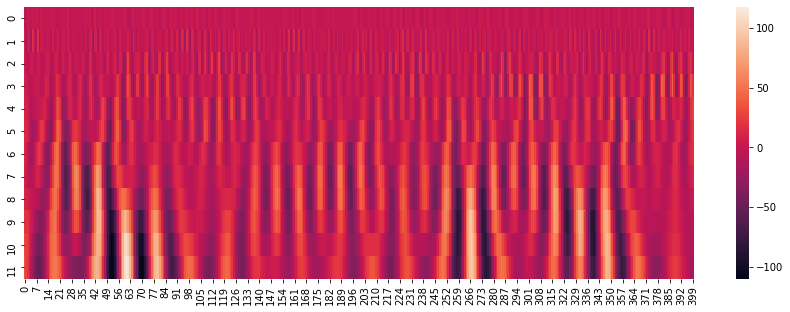

In [10]:
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.heatmap(scalo1)

In [11]:
def make_scalogram(data,freq,window_size):
    N = 10 ## used to save memory
    data = rolling_window(data,window_size)
    n_steps = math.ceil(data.shape[0] / N)
    X = []
    for i in range(n_steps):
        res_ = pywt.cwt(data=data[i * N: (i+1) * N] , wavelet='morl', scales=freq, axis=1)[0] 
        #if config["sqr_signal"]:
        res_=res_.transpose((1,3,0,2))[:,:,:,::10] **2
        #else:
        #    res_=np.abs(res_.transpose((1,3,0,2))[:,:,:,::10])
        X.append(res_)
    return np.concatenate(X,axis=0)

def rolling_window(a, window_size):
    shape = (a.shape[0] - window_size, window_size) + a.shape[1:]
    strides = (a.strides[0],) + a.strides
    print(shape,strides)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

freq = np.linspace(1,15,15)
scalo = make_scalogram(data.signal[25000:65000:100],freq,100)

(300, 100, 32) (26400, 26400, 8)


In [12]:
scalo.shape

(300, 32, 15, 10)

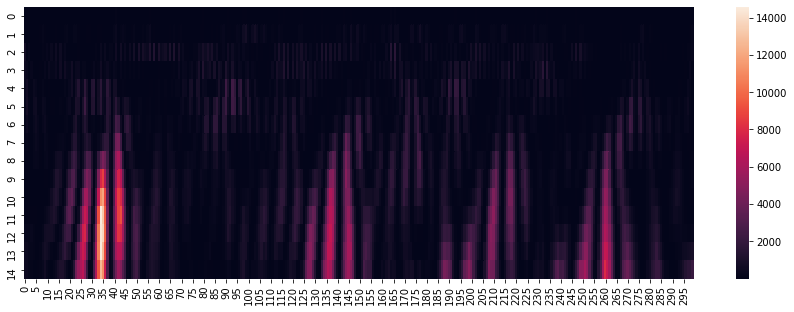

In [13]:
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.heatmap(scalo[:,1,:, 1].T)

In [14]:
frequencies, times, spectrogram = scipy.signal.spectrogram(data.signal[25000:65000:100, 0], 100,nperseg=100,noverlap=99,nfft = 128,mode='magnitude')

In [ ]:
for i in range(32):
  f = plt.figure(figsize=(15, 3))
  frequencies, times, spectrogram = scipy.signal.spectrogram(data.signal[25000:30000:50,i], 50,nperseg=25,noverlap=24,nfft = 64,mode='magnitude')
  plt.pcolormesh(times, frequencies, spectrogram, shading='gouraud')
  plt.title(f'Electrode {i}')
  plt.ylabel('Frequency')
  plt.xlabel('Time')
  #plt.savefig(f'spectr{i}.png')
  plt.show()

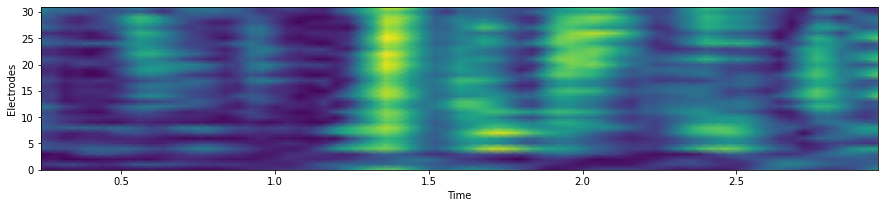

In [81]:
spectrs = []
f = plt.figure(figsize=(15, 3))
for i in range(32):
  frequencies, times, spectrogram = scipy.signal.spectrogram(data.signal[28000:30000:25,i], 25,nperseg=12,noverlap=11,nfft = 32,mode='magnitude')
  spectrs.append(spectrogram[1])
spectrs = np.array(spectrs)
plt.pcolormesh(times, list(range(32)), spectrs, shading='gouraud')
plt.ylabel('Electrodes')
plt.xlabel('Time')
plt.savefig('electrodes_spectr.png')
plt.show()

In [ ]:
spectrogram.shape, frequencies.shape

((33, 76), (33,))

Text(34.57500000000002, 0.5, 'V')

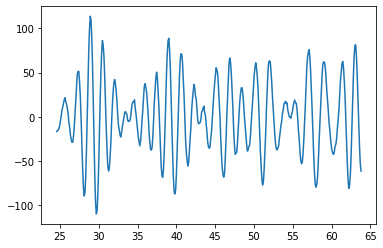

In [ ]:
#ax4 = sns.heatmap(scalo, cbar=False)
plt.plot(data.time[25000:65000:100],scalo[10])
ax5.set_xlabel('t, sec')
ax5.set_ylabel('V')

In [ ]:
data.time[25000:65000:133].shape

(301,)

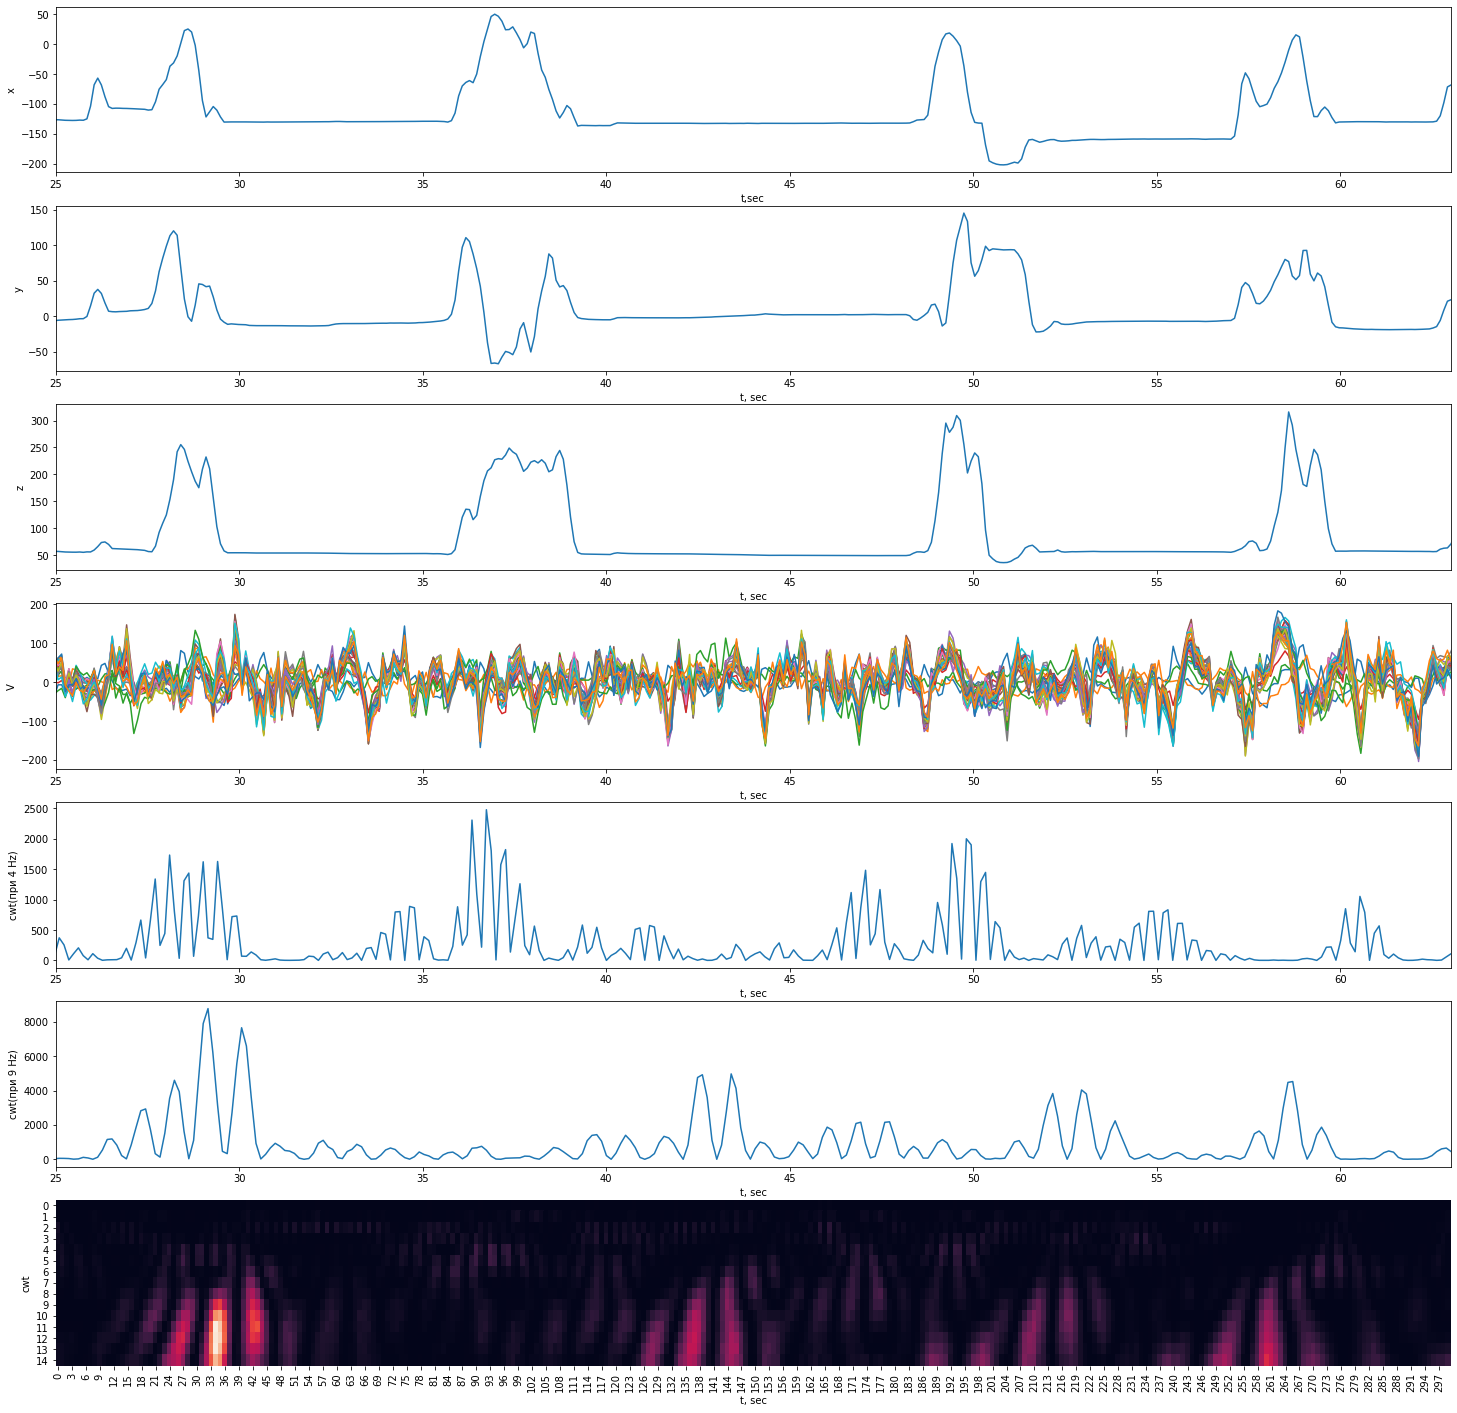

In [72]:
fig ,(ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7,1,figsize=(25,25))
ax1.plot(data.time[25000:65000:100],data.motion[25000:65000:100,0])
ax1.set_xlabel('t,sec')
ax1.set_xlim(25, 63)
ax1.set_ylabel('x')

ax2.plot(data.time[25000:65000:100],data.motion[25000:65000:100,1])
ax2.set_xlabel('t, sec')
ax2.set_xlim(25, 63)
ax2.set_ylabel('y')

ax3.plot(data.time[25000:65000:100],data.motion[25000:65000:100,2])
ax3.set_xlabel('t, sec')
ax3.set_xlim(25, 63)
ax3.set_ylabel('z')

ax4.plot(data.time[25000:65000:100],data.signal[25000:65000:100])
ax4.set_xlabel('t, sec')
ax4.set_xlim(25, 63)
ax4.set_ylabel('V')

ax5.plot(data.time[25000:65000:133][:-1],scalo[:,1,4,1].T)
ax5.set_xlabel('t, sec')
ax5.set_xlim(25, 63)
ax5.set_ylabel('cwt(при 4 Hz)')

ax6.plot(data.time[25000:65000:133][:-1],scalo[:,1,9,1].T)
ax6.set_xlabel('t, sec')
ax6.set_xlim(25, 63)
ax6.set_ylabel('cwt(при 9 Hz)')

ax7 = sns.heatmap(scalo[:,1,:,1].T , cbar=False)
#ax4.plot(data.time[15000:55000:100],scalo[10])
ax7.set_xlabel('t, sec')
ax7.set_ylabel('cwt')
fig.show()

In [18]:
centers = np.array([[187,168],[190,126],[225,180],[229,141],[264,227],[264,193],[266,152],[282,215],[303,236],
              [303,198],[306,155],[325,221],[325,178],[323,136],[343,246],[349,205],[347,162],[340,120],[365,230],
              [365,185],[362,143],[386,212],[385,164],[380,122],[400,233],[405,190],[405,147],[420,214],[424,165],[424,125],
              [455,165],[460,125]],dtype = 'float')
scaled_centers = np.zeros_like(centers)
scaled_centers[:,0] = (centers[:,0] - centers[:,0].mean())/centers[:,0].std()
scaled_centers[:,1] = (centers[:,1]  -centers[:,1].mean())/centers[:,1].std()

In [74]:
a, b = scalo.min(), scalo.max()
print(a)
list(range(int(a), int(b), 10000))

2.768513763911371e-10


[0,
 10000,
 20000,
 30000,
 40000,
 50000,
 60000,
 70000,
 80000,
 90000,
 100000,
 110000,
 120000,
 130000,
 140000,
 150000]

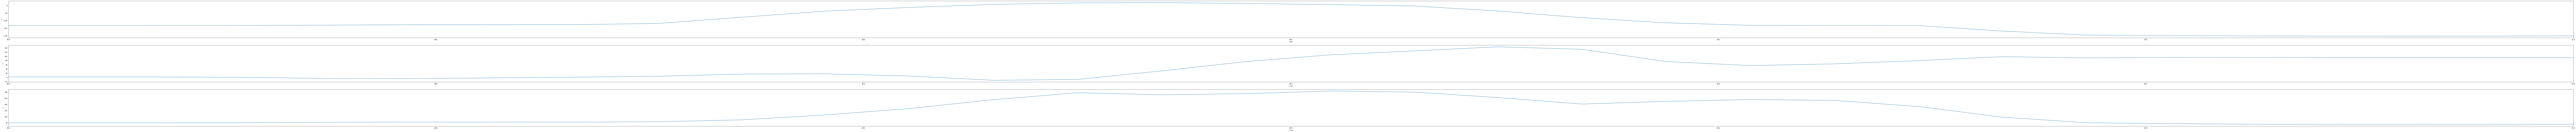

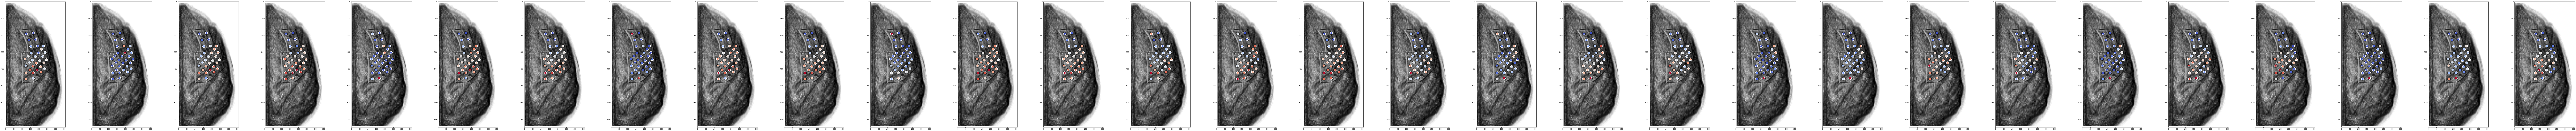

In [54]:
from PIL import Image
from matplotlib import cm
rng = (182, 210)
fig ,(ax1, ax2, ax3) = plt.subplots(3,1,figsize=(300,15))
ax1.plot(data.time[48000:52000:100],data.motion[48000:52000:100,0])
ax1.set_xlabel('t,sec')
ax1.set_xlim(48,51)
ax1.set_ylabel('x')

ax2.plot(data.time[48000:52000:100],data.motion[48000:52000:100,1])
ax2.set_xlabel('t, sec')
ax2.set_xlim(48,51)
ax2.set_ylabel('y')

ax3.plot(data.time[48000:52000:100],data.motion[48000:52000:100,2])
ax3.set_xlabel('t, sec')
ax3.set_xlim(48,51)
ax3.set_ylabel('z')

#len(list(range(*rng)))
f, ax = plt.subplots(7, 4, figsize=(30,100))
for i in range(7):
  for j in range(4):
    img = Image.open('A.png')
    ar = np.array(img)
    #plt.figure(figsize=(15,10))
    ax[i][j].scatter(centers[:,1],centers[:,0],c=(scalo[4*i+j,:,4,1]-scalo.min()) / (scalo.max() - scalo.min()),s=150, cmap=cm.coolwarm)
  #plt.title("Коэффициент корреляции по электродам на частоте {} Hz".format(round(frequencies[i]*10) ))
    ax[i][j].imshow(ar)
#plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
#cax=plt.axes(list(range(int(scalo.min()), int(scalo.max()), 10000)))
#plt.colorbar(im_, ax=axes.ravel().tolist())
plt.show()
 # plt.savefig("spectr_lm_corr_{}_Hz.png".format(round(10*frequencies[i])))

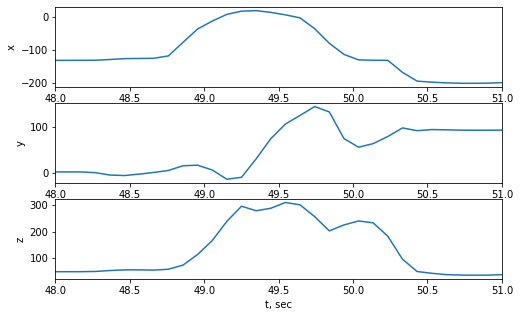

In [70]:
fig ,(ax1, ax2, ax3) = plt.subplots(3,1,figsize=(8,5))
ax1.plot(data.time[48000:52000:100],data.motion[48000:52000:100,0])
ax1.set_xlabel('t,sec')
ax1.set_xlim(48,51)
ax1.set_ylabel('x')

ax2.plot(data.time[48000:52000:100],data.motion[48000:52000:100,1])
ax2.set_xlabel('t, sec')
ax2.set_xlim(48,51)
ax2.set_ylabel('y')

ax3.plot(data.time[48000:52000:100],data.motion[48000:52000:100,2])
ax3.set_xlabel('t, sec')
ax3.set_xlim(48,51)
ax3.set_ylabel('z');

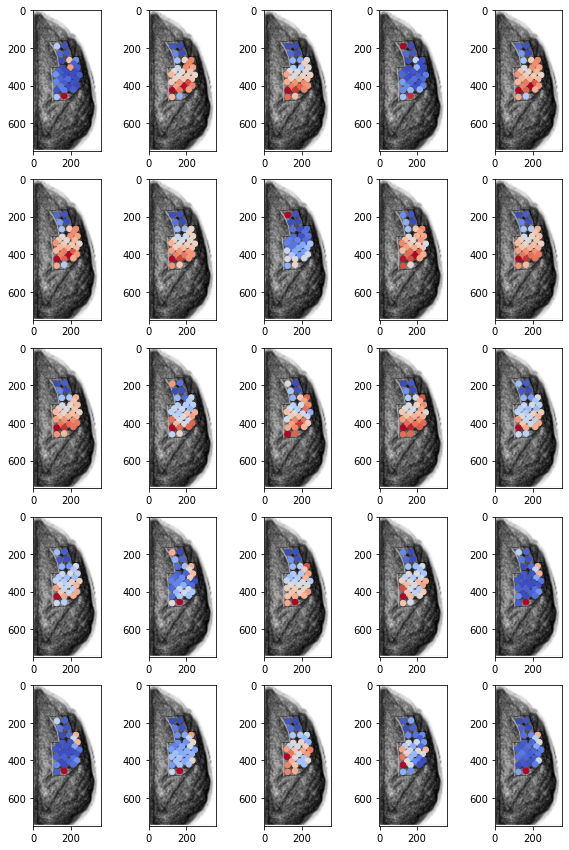

In [68]:
f, ax = plt.subplots(5, 5, figsize=(10,15))
for i in range(5):
  for j in range(5):
    img = Image.open('A.png')
    ar = np.array(img)
    #plt.figure(figsize=(15,10))
    ax[i][j].scatter(centers[:,1],centers[:,0],c=(scalo[184+4*i+j,:,4,1]-scalo.min()) / (scalo.max() - scalo.min()),s=30, cmap=cm.coolwarm)
  #plt.title("Коэффициент корреляции по электродам на частоте {} Hz".format(round(frequencies[i]*10) ))
    ax[i][j].imshow(ar)
#plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
#cax=plt.axes(list(range(int(scalo.min()), int(scalo.max()), 10000)))
#plt.colorbar(im_, ax=axes.ravel().tolist())
plt.show()

In [21]:
def matrix_gaussian(centers, args): #x is 32x2 
  mu = args[:,:2] #Nx2
  c = np.repeat(centers,args.shape[0],axis=1).reshape(centers.shape[0],centers.shape[1],args.shape[0]).transpose(2,0,1)
  
  mu = np.expand_dims(mu,1)
  x_avg = c - mu
  #print(x_avg.shape)
  Sigmas = np.empty((args.shape[0],2,2))
  Sigmas[:,0,0] = args[:,2]
  Sigmas[:,0,1] = args[:,3]
  Sigmas[:,1,1] = args[:,4]
  Sigmas[:,1,0] = args[:,3]
  A = np.expand_dims(args[:,5],1)
  
  Inv = np.linalg.inv(Sigmas)
  #print(Inv.shape)
  #print((Inv @ x_avg.transpose(0,2,1)).shape)
  val = np.einsum('jii->ji',(x_avg @ Inv @ x_avg.transpose(0,2,1)))
  return  (A * np.exp( -0.5 * val)).T

In [22]:
def matrix_find_best_A(args,signal,centers):
  #def func(A):
  pred = matrix_gaussian(centers,args)#np.array([matrix_gaussian(centers[i],args) for i in range(32)])
   # return np.sqrt(np.sum(((signal - A * pred)) ** 2))
  #a_best = scipy.optimize.minimize(func,0.1)
  return np.sum(signal,axis=1)/np.sum(pred,axis=0)
def matrix_normal_features(signal,centers): #signal is Nx32, centers 32x2
  c = centers.copy()
  M = (signal @ centers)/np.expand_dims(signal.sum(axis=1),1)
  w_sum = np.sum(signal,axis=1)
  fact = np.expand_dims(np.expand_dims(w_sum - 1 * np.sum(signal ** 2,axis=1)/w_sum, 1),2)

  S = np.array([np.diag(signal[i]) for i in range(signal.shape[0])])/fact

  centers = np.repeat(centers,M.shape[0],axis=1).reshape(centers.shape[0],centers.shape[1],M.shape[0]).transpose(2,0,1)
  centers -= np.expand_dims(M,1)
  Sigma = centers.transpose(0,2,1) @ S @ centers
  
  Sigma = np.expand_dims(Sigma,3)
  #print((w_sum - 1 * np.sum(signal ** 2,axis=1)/w_sum))
  #print(np.expand_dims(M,1).shape, Sigma.shape)
  args = np.hstack([M,Sigma[:,0,0],Sigma[:,0,1],Sigma[:,1,1],np.ones((signal.shape[0],1))])
  A = matrix_find_best_A(args,signal,c)
  args[:,-1] = A
  return args

def spectral_lm(scalo,centers,kind="normal",local_centers=None):
    # the shape of sclogram is N_samples * N_electrodes * N_freqs * N_timestamps
    
    if kind=='normal':
        res = np.zeros((scalo.shape[0],6,scalo.shape[2],scalo.shape[3]))
        for j in range(scalo.shape[2]):
            for k in range(scalo.shape[3]):
                res[:,:,j,k] = matrix_normal_features(scalo[:,:,j,k],centers) 
    if kind=="rbf":
        res = np.zeros((scalo.shape[0],10,scalo.shape[2],scalo.shape[3]))
        for j in range(scalo.shape[2]):
            for k in range(scalo.shape[3]):
                res[:,:,j,k] = rbf_local_model(scalo[:,:,j,k],centers,local_centers) 
    return res

In [26]:
scalo[:,:,1,0].shape

(300, 32)

In [23]:
specs = []
for i in range(32):
  frequencies, times, spectrogram = scipy.signal.spectrogram(data.signal[:100000,i], 100,nperseg=100,noverlap=99,nfft = 128,mode='magnitude')
  specs.append(spectrogram)

In [24]:
S = np.array(specs).transpose(1,2,0)

In [30]:
S[0].shape

(99901, 32)

In [73]:
scalo = make_scalogram(data.signal[25000:65000],freq,100)

(39900, 100, 32) (264, 264, 8)


In [74]:
scalo.shape

(39900, 32, 15, 10)

In [75]:
nf_spec = np.array([matrix_normal_features(scalo[:,:,i,0],scaled_centers) for i in range(scalo.shape[2])])


In [76]:
restored_scalo = np.array([matrix_gaussian(scaled_centers,nf_spec[i]) for i in range(nf_spec.shape[0])]).transpose(0,2,1)

In [34]:
restored_scalo.shape

(15, 300, 32)

In [ ]:
scalo[:,i,n,0]

In [40]:
scalo[:,:,:,0].transpose(2, 0, 1).shape

(15, 300, 32)

In [77]:
Corr = []
Scorr = []
for n in range(scalo.shape[2]):
  corr = []
  scorr = []
  for i in range(32):
    corr.append(scipy.stats.pearsonr(scalo[:,:,:,0].transpose(2, 0, 1)[n,:,i],restored_scalo[n,:,i])[0])
    scorr.append(scipy.stats.spearmanr(scalo[:,:,:,0].transpose(2, 0, 1)[n,:,i],restored_scalo[n,:,i])[0])
  Corr.append(corr)
  Scorr.append(scorr)
  print("average corr = {}, average scorr = {}".format(np.mean(corr), np.mean(scorr)))

average corr = 0.9109076664719769, average scorr = 0.7040666762443141
average corr = 0.9047131727685436, average scorr = 0.6585399613499758
average corr = 0.9203669988578836, average scorr = 0.692846882633892
average corr = 0.9216257558980945, average scorr = 0.7102002186055614
average corr = 0.9172593156952339, average scorr = 0.7210696139144832
average corr = 0.913919773972802, average scorr = 0.7258006441765266
average corr = 0.9102821641931401, average scorr = 0.7289038225989626
average corr = 0.9046608198787599, average scorr = 0.7287371895830712
average corr = 0.896636463056929, average scorr = 0.7278412875501296
average corr = 0.8865799304056383, average scorr = 0.72699149743925
average corr = 0.8767857607543592, average scorr = 0.7270017400870397
average corr = 0.8694682447106831, average scorr = 0.7268348781780842
average corr = 0.8633136934512253, average scorr = 0.7270101833862201
average corr = 0.8596155692973406, average scorr = 0.7271247272843497
average corr = 0.85669648

In [79]:
np.array(Corr).mean(), np.array(Scorr).mean()

(0.8941887874415113, 0.7173574769717513)

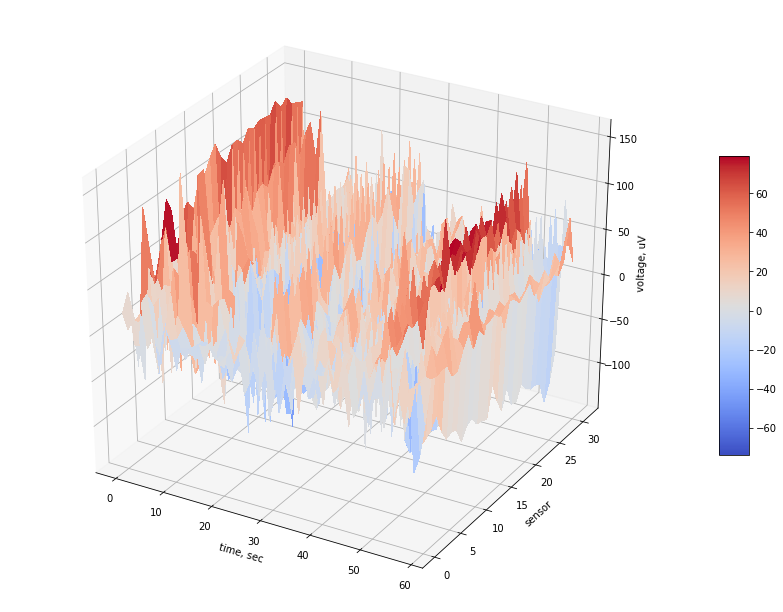

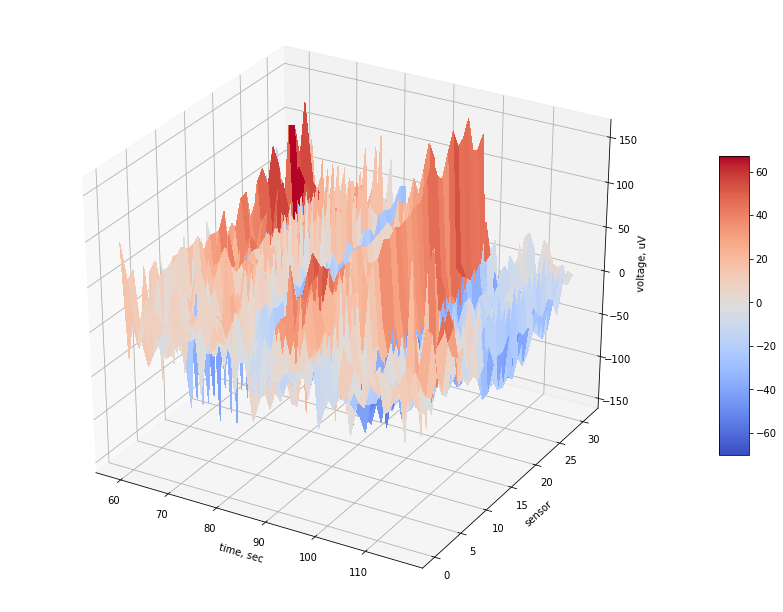

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize=(15, 11))
ax = fig.gca(projection='3d')

# Make data.
Y = np.arange(0, 32, 1)
X = data.time[:60000:1000]
X, Y = np.meshgrid(X, Y)
Z = data.signal[:60000:1000].T

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_xlabel('time, sec')
ax.set_ylabel('sensor')
ax.set_zlabel('voltage, uV')
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

fig = plt.figure(figsize=(15, 11))
ax = fig.gca(projection='3d')

# Make data.
Y = np.arange(0, 32, 1)
X = data.time[60000:120000:1000]
X, Y = np.meshgrid(X, Y)
Z = data.signal[60000:120000:1000].T

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_xlabel('time, sec')
ax.set_ylabel('sensor')
ax.set_zlabel('voltage, uV')
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

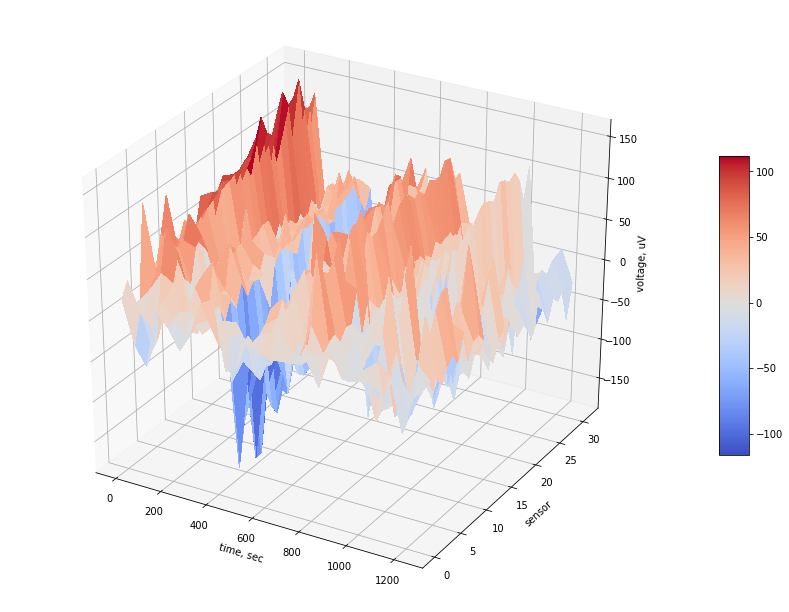

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize=(15, 11))
ax = fig.gca(projection='3d')

# Make data.
Y = np.arange(0, 32, 1)
X = data.time[::50000]
X, Y = np.meshgrid(X, Y)
Z = data.signal[::50000].T

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_xlabel('time, sec')
ax.set_ylabel('sensor')
ax.set_zlabel('voltage, uV')
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

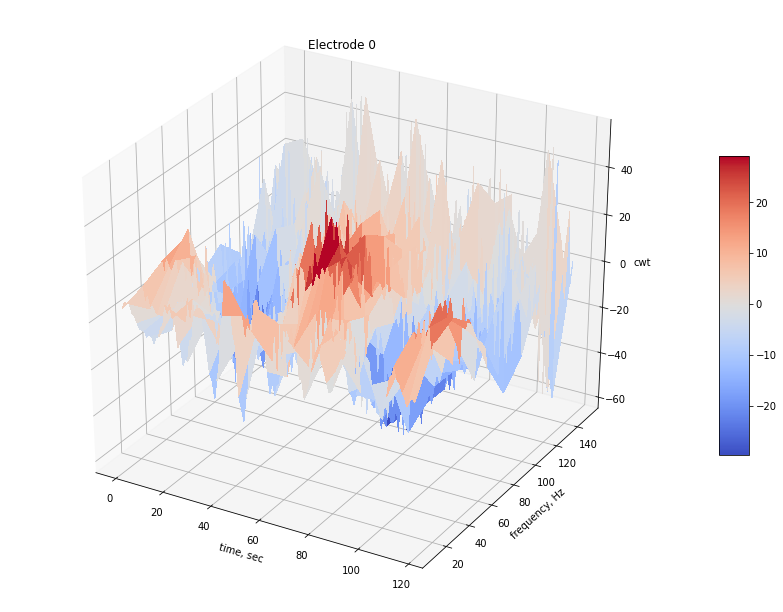

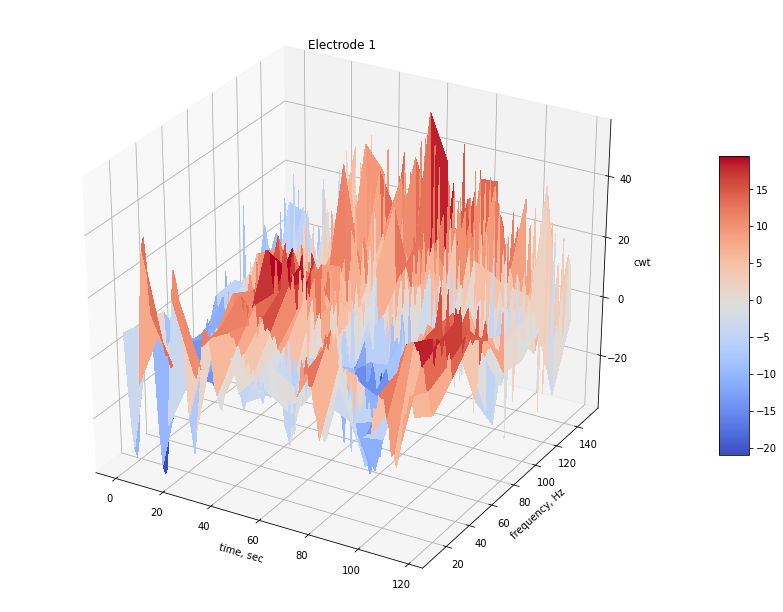

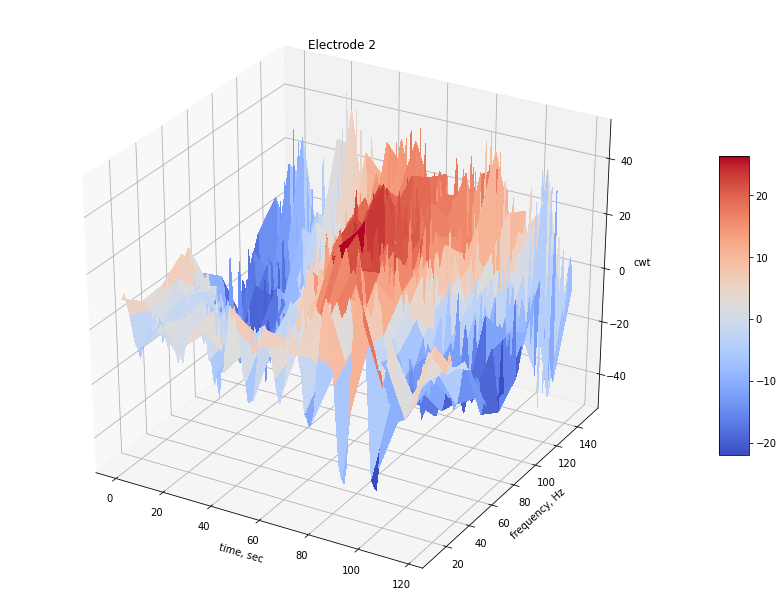

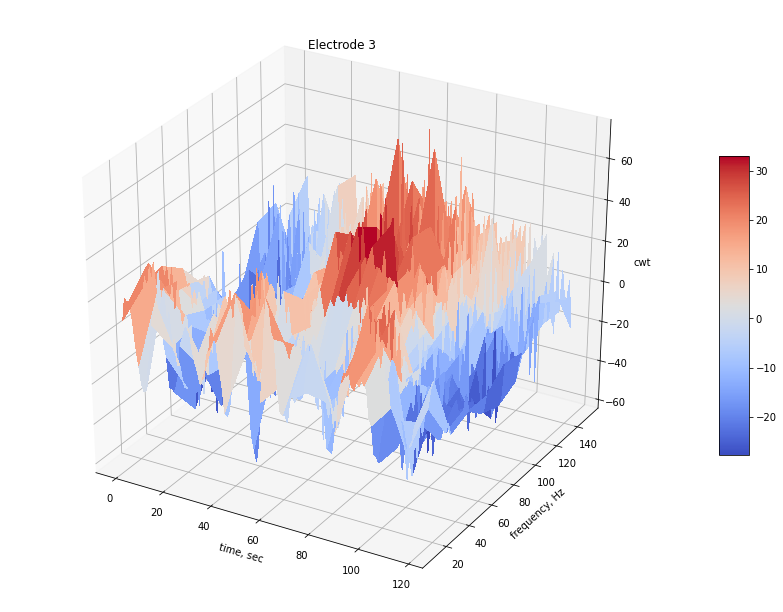

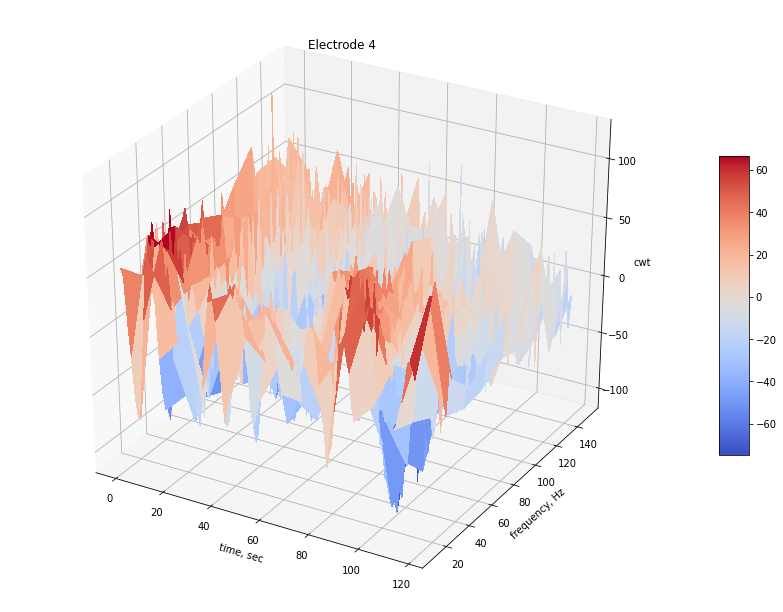

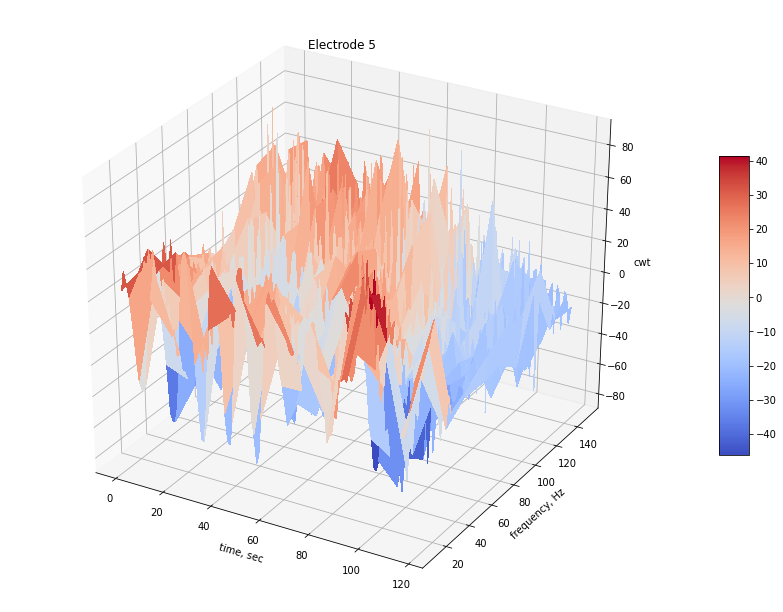

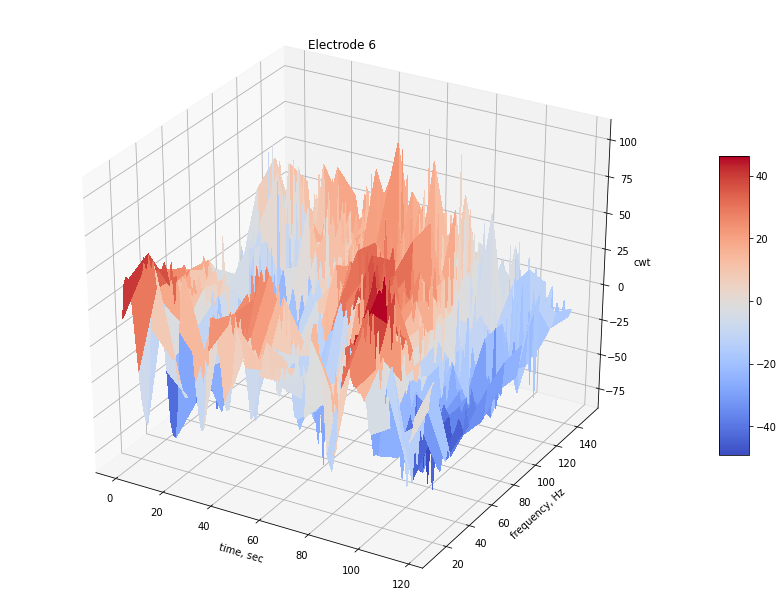

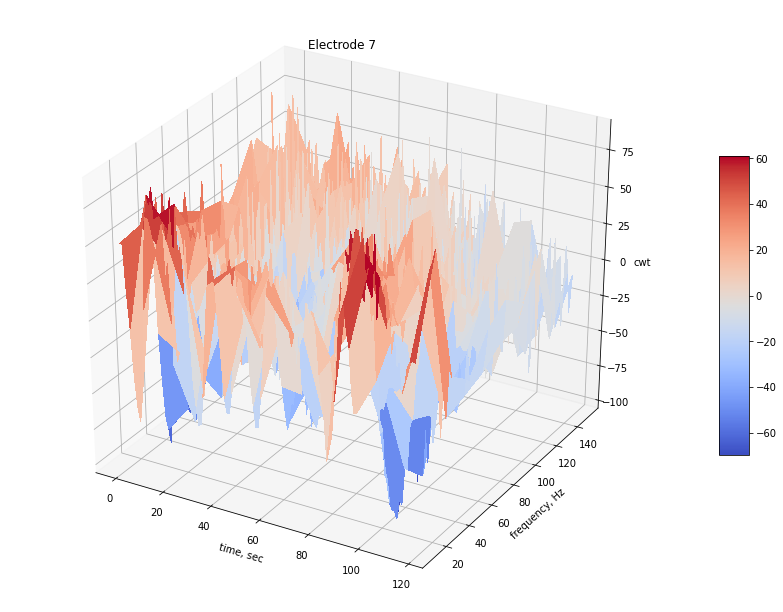

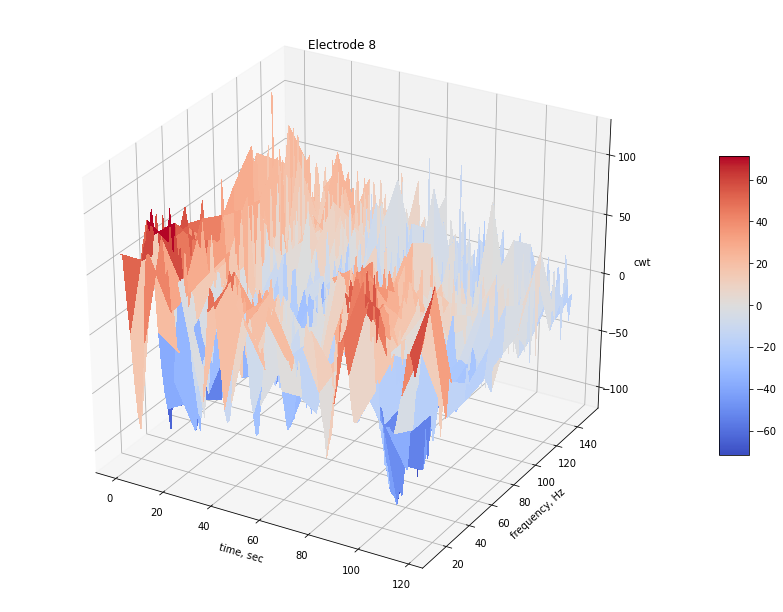

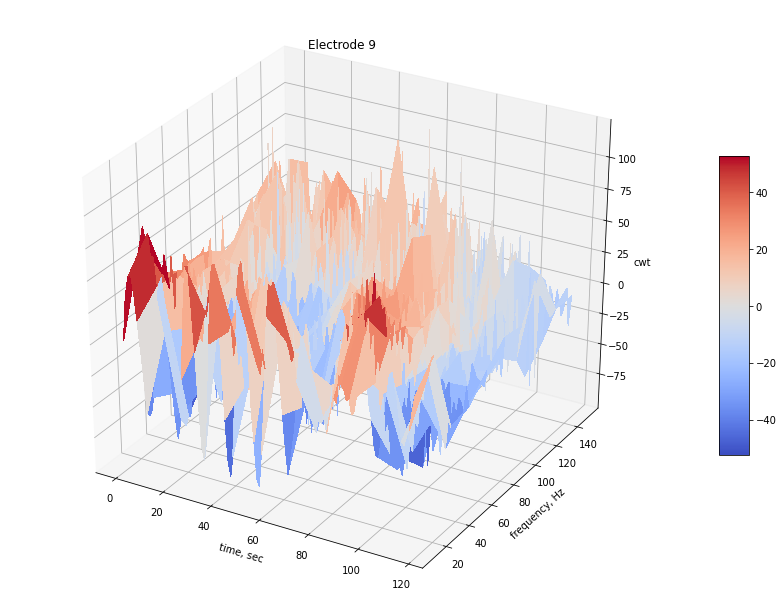

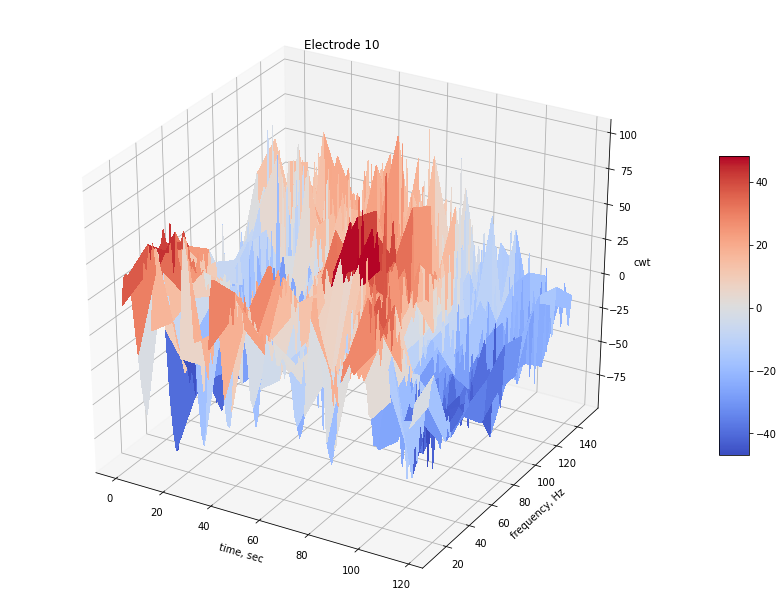

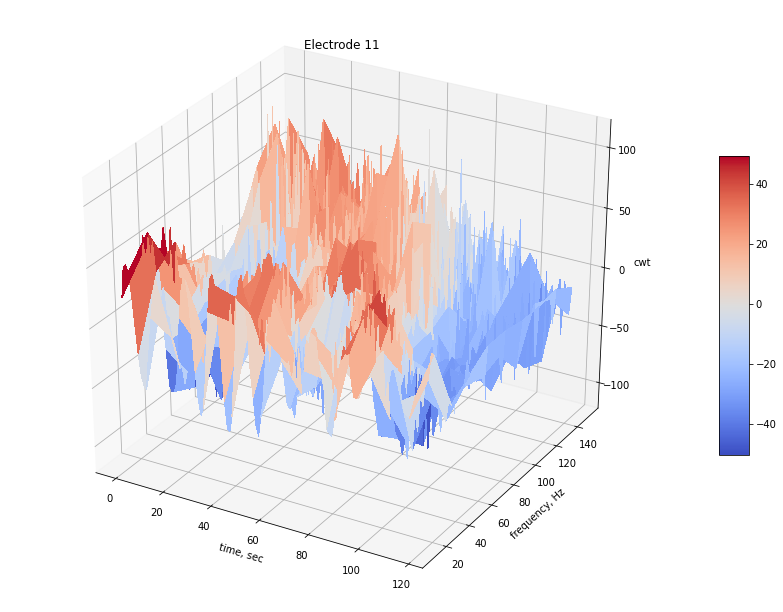

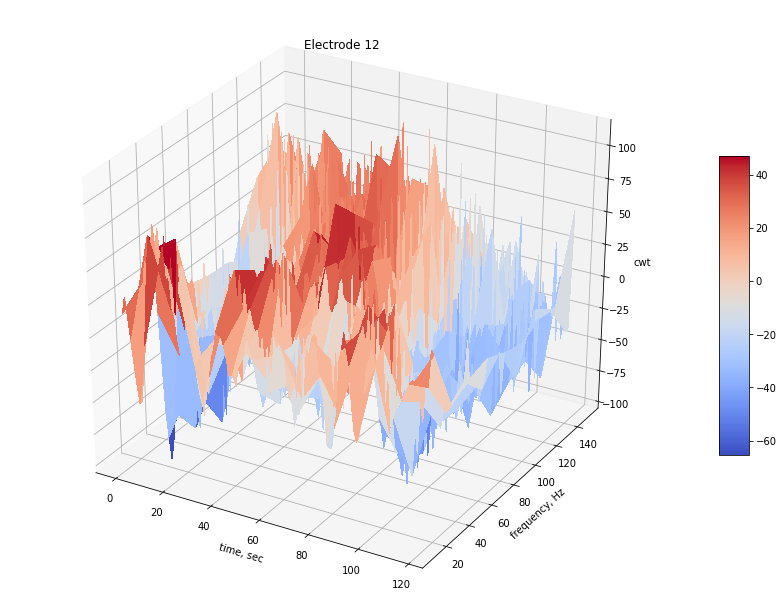

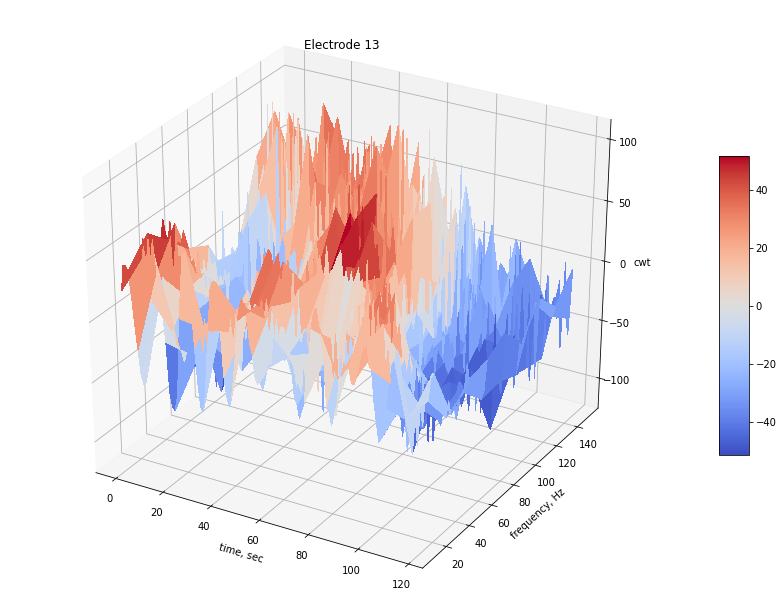

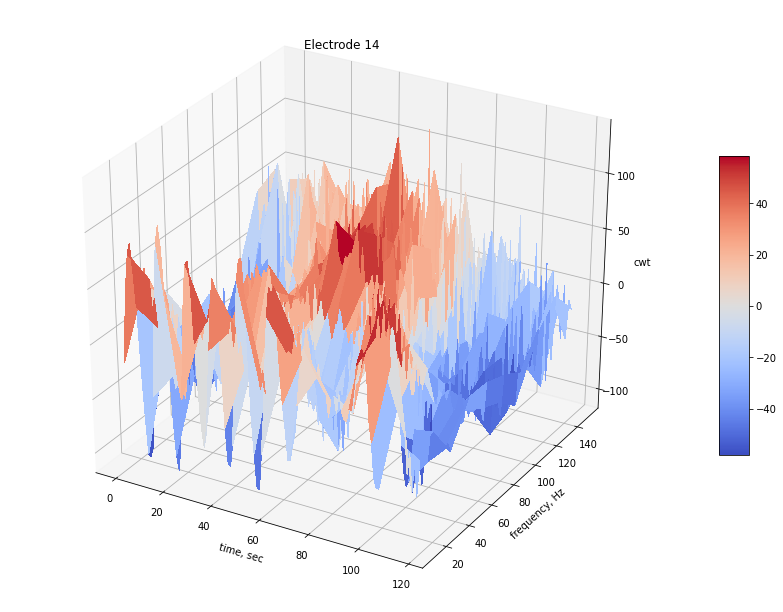

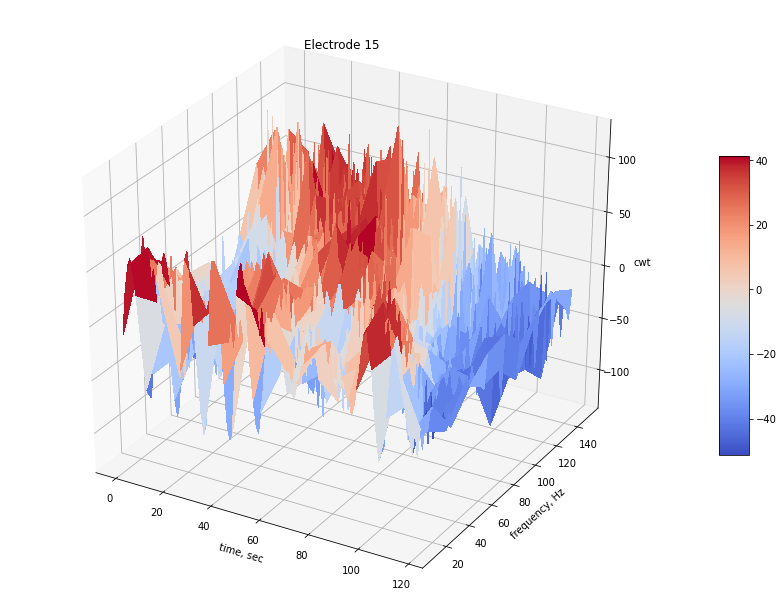

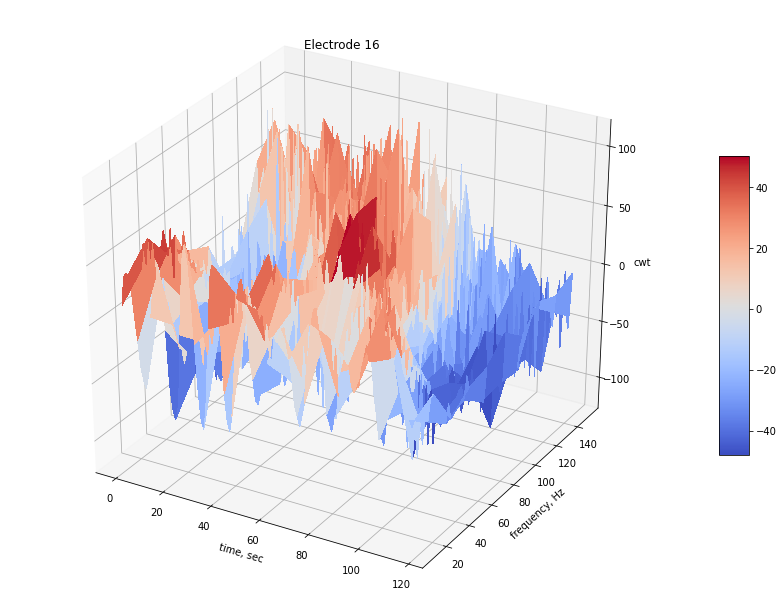

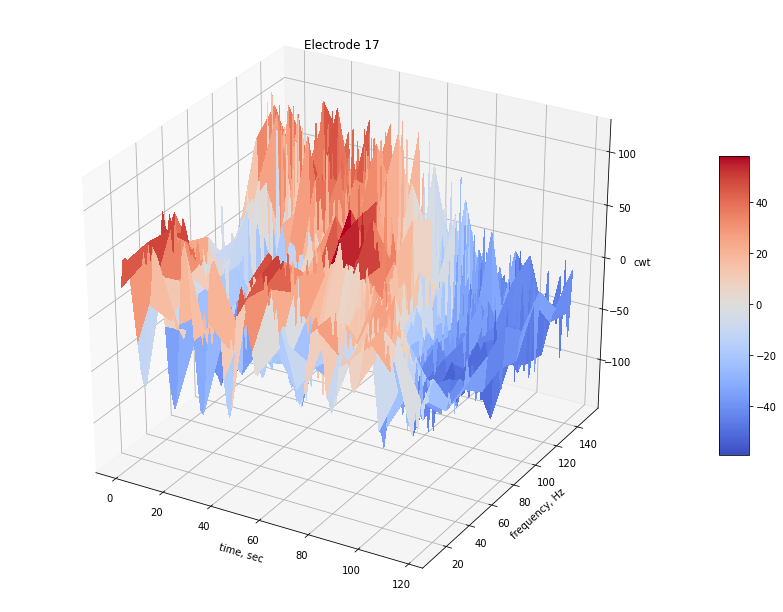

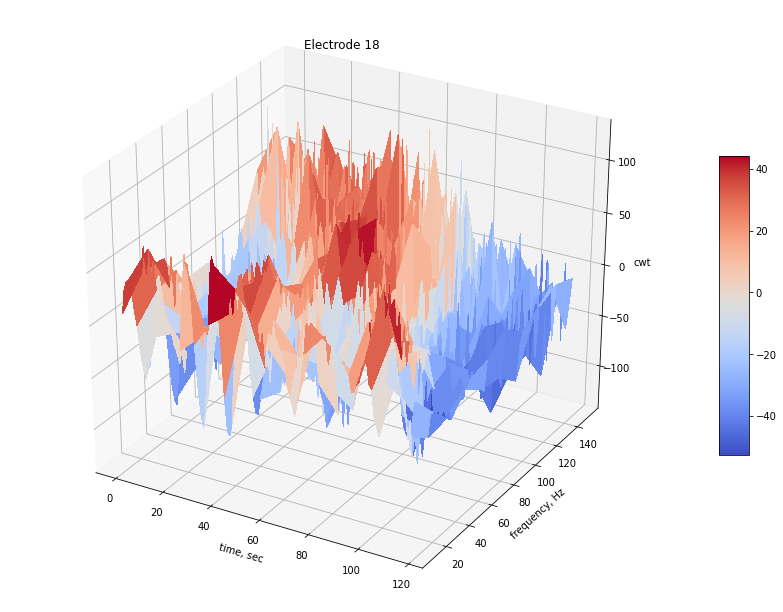

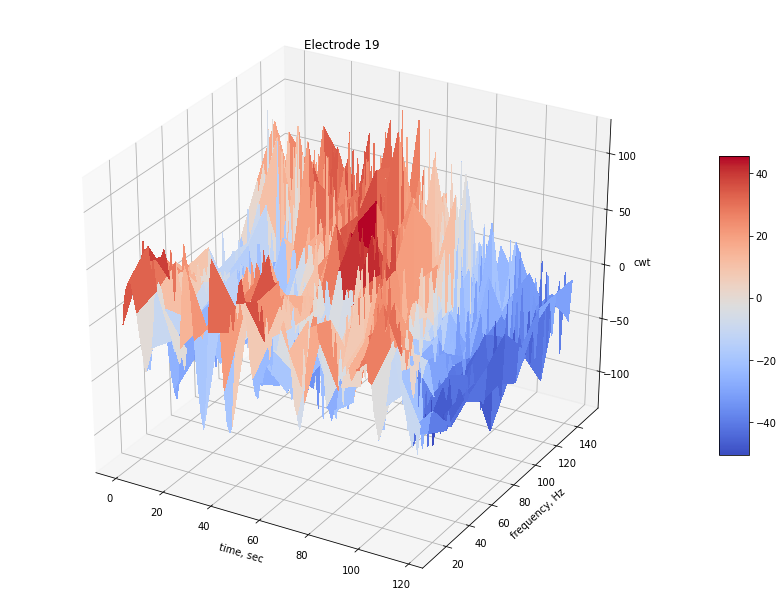

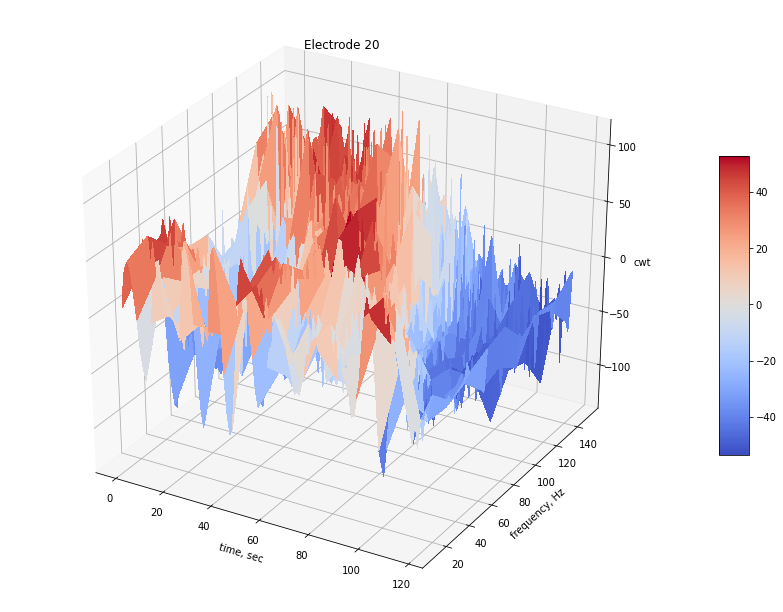

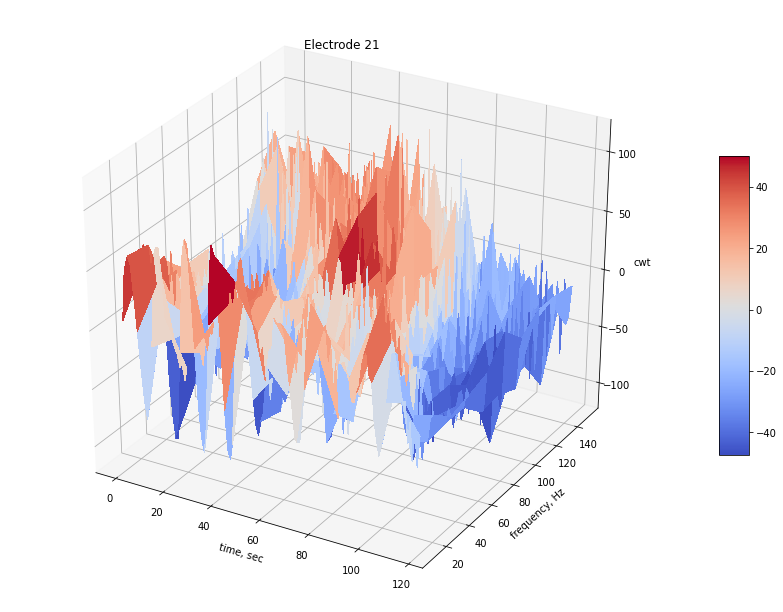

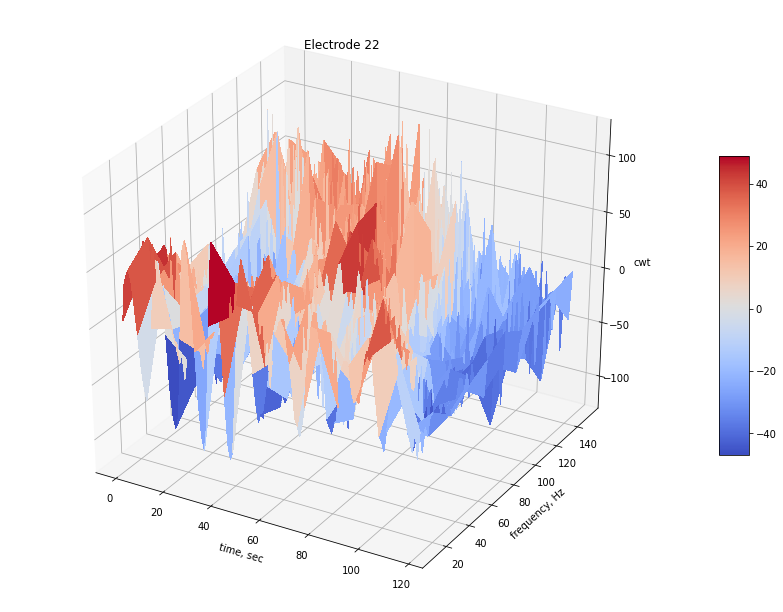

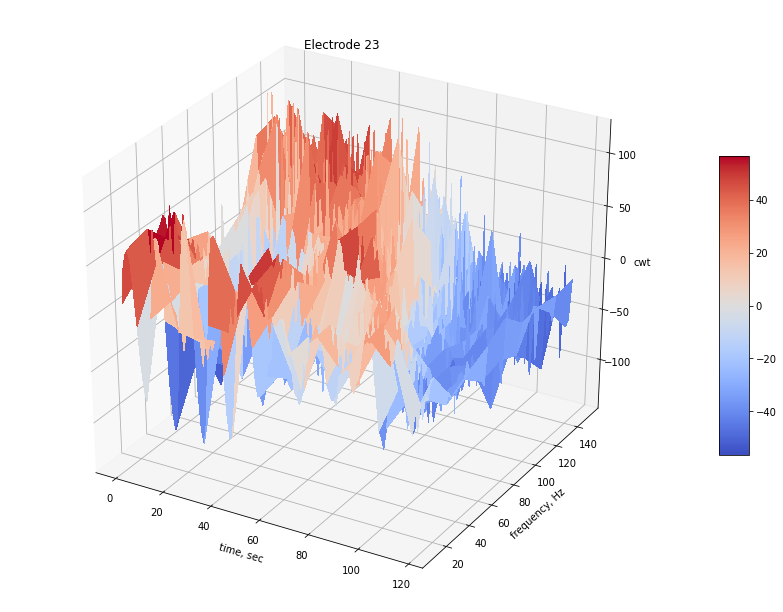

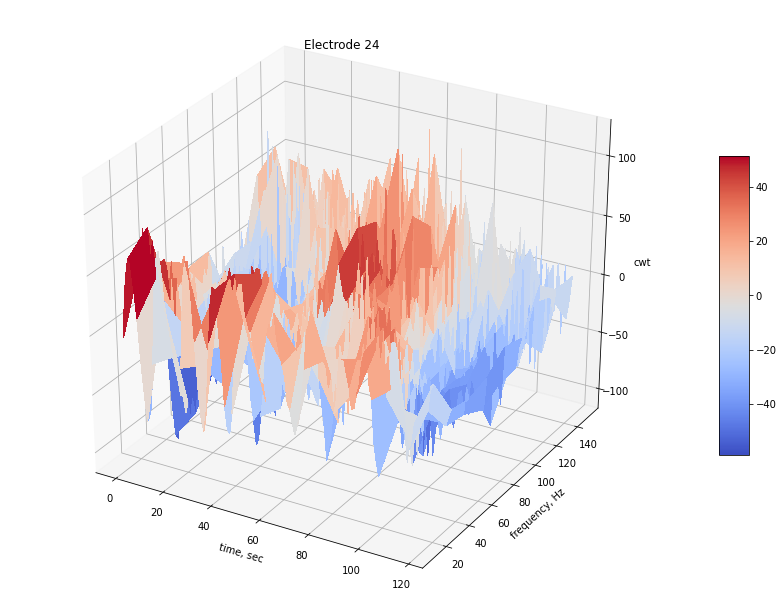

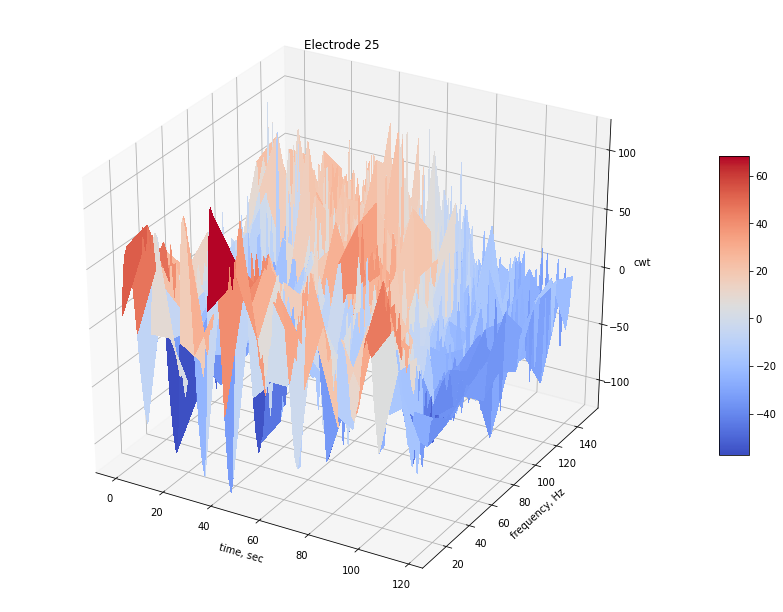

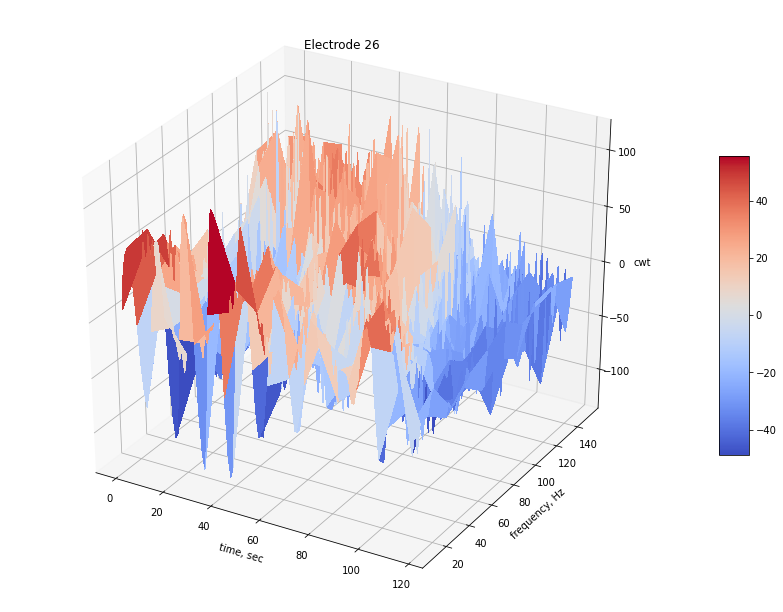

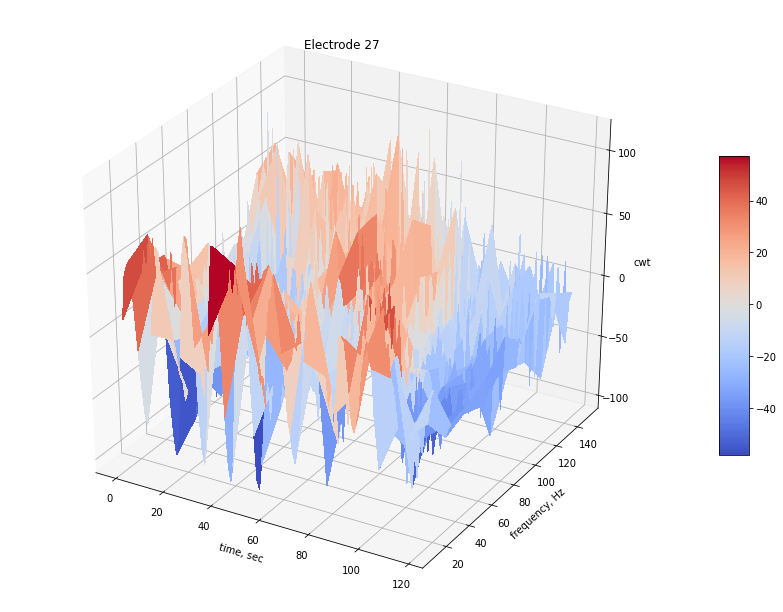

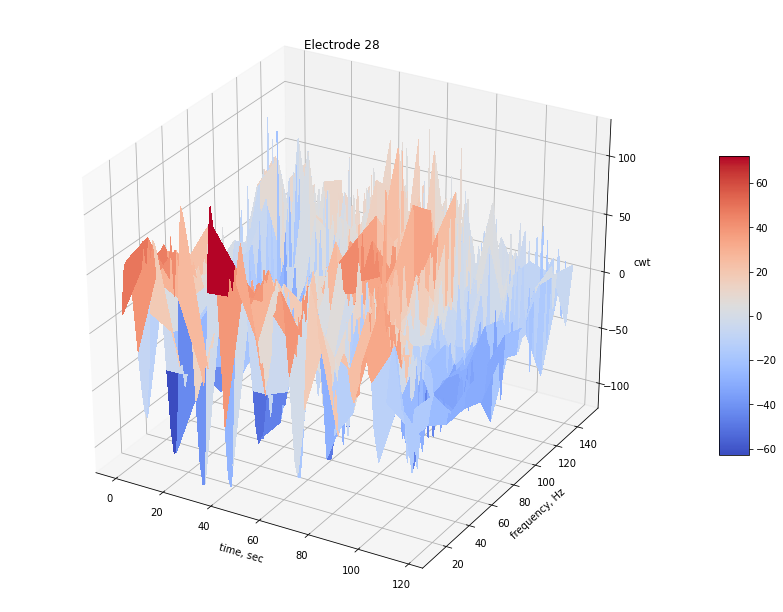

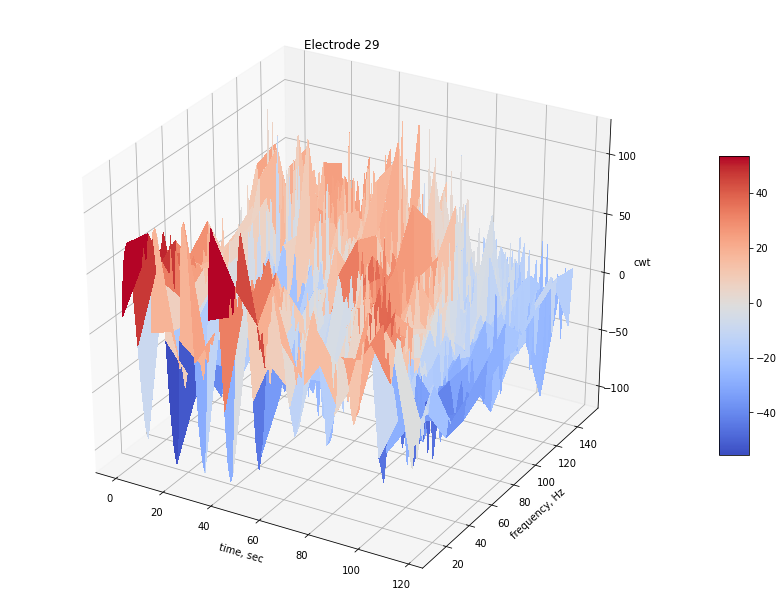

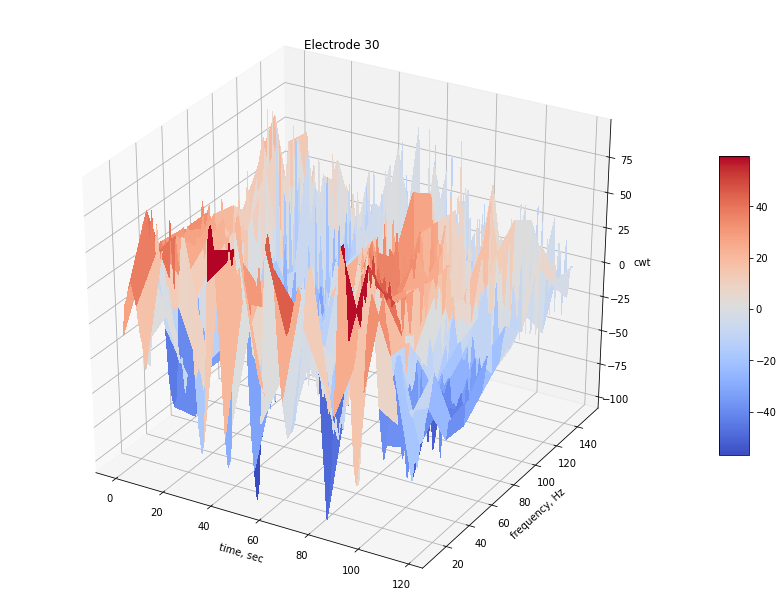

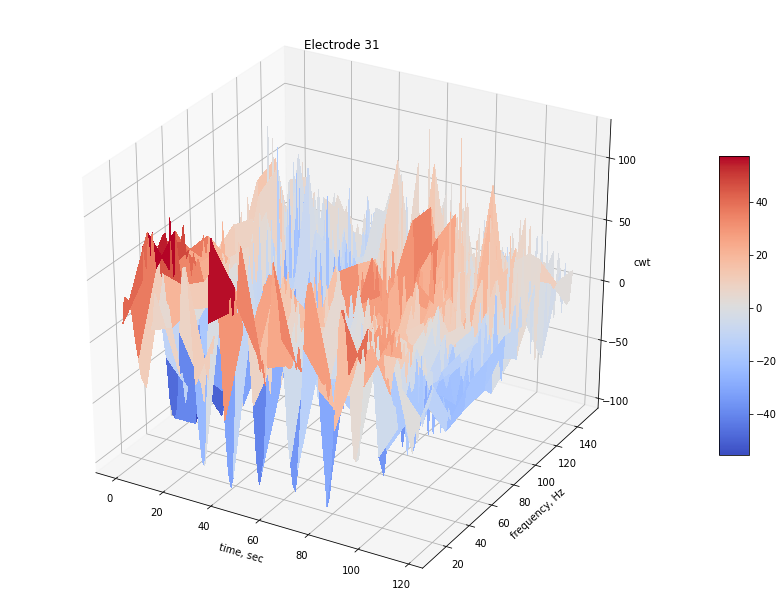

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

for el in range(data.signal.shape[1]):
    fig = plt.figure(figsize=(15, 11))
    ax = fig.gca(projection='3d')

    # Make data.
    Y = np.linspace(10, 150, 10)
    X = data.time[:120000:1000]
    Z = pywt.cwt(data.signal[:120000:1000, el], wavelet='morl', scales=Y)[0]
    X, Y = np.meshgrid(X, Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                          linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_xlabel('time, sec')
    ax.set_ylabel('frequency, Hz')
    ax.set_zlabel('cwt')
    ax.set_title("Electrode "+str(el))
    #ax.set_zlim(-1.01, 1.01)
    #ax.zaxis.set_major_locator(LinearLocator(10))
    #ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=10)

    plt.show()

In [138]:
!pip install dtaidistance

     |████████████████████████████████| 942kB 27.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for dtaidistance: filename=dtaidistance-2.2.5-cp37-cp37m-linux_x86_64.whl size=1555507 sha256=dbe7d74a9863d720817961fa71a5cae1d5d70265fdb579963fa55d3ddcc23d5d
  Stored in directory: /root/.cache/pip/wheels/f8/37/a3/5b68a20ca502772e5affea6be75bf964ad9f481fdc54f28627
Successfully built dtaidistance


[68331143.99958622 67797260.99936299 67162074.52658904]
2


/usr/local/lib/python3.7/dist-packages/dtaidistance/dtw.py:428: RuntimeWarning: invalid value encountered in sqrt
  dtw = np.sqrt(dtw)


<Figure size 576x576 with 0 Axes>

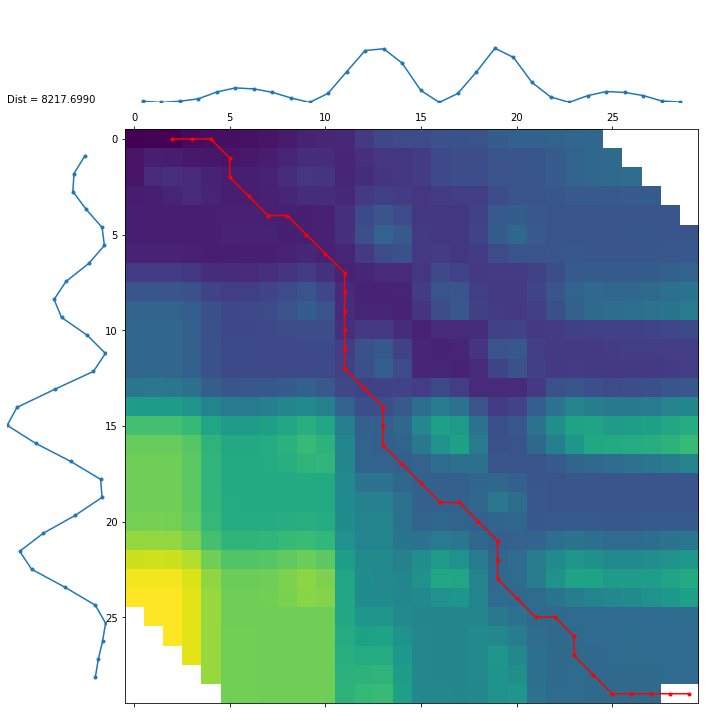

In [144]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import random
import numpy as np
f = plt.figure(figsize=(8,8))
s1 = scalo[20:50,1,9,1].T
s2 = scalo[125:155,1 ,9,1].T
#x = np.arange(0, 20, .5)
#s1 = np.sin(x)
#s2 = 3 * np.cos(x + 2)
#random.seed(1)
#for idx in range(len(s2)):
#    if random.random() < 0.05:
#        s2[idx] += (random.random() - 0.5) / 2
d, paths = dtw.warping_paths(s1, s2, window=25, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path);

In [ ]:
 best_path

[(0, 2),
 (1, 2),
 (2, 3),
 (2, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (5, 12),
 (6, 12),
 (7, 13),
 (7, 14),
 (8, 15),
 (9, 15),
 (10, 15),
 (11, 15),
 (12, 16),
 (13, 17),
 (14, 18),
 (14, 19),
 (15, 20),
 (16, 21),
 (17, 22),
 (18, 22),
 (19, 23),
 (20, 24),
 (21, 24),
 (22, 25),
 (23, 25),
 (24, 25),
 (25, 26),
 (25, 27),
 (26, 28),
 (26, 29),
 (26, 30),
 (26, 31),
 (26, 32),
 (26, 33),
 (27, 34),
 (28, 34),
 (29, 34),
 (30, 34),
 (31, 34),
 (32, 34),
 (33, 34),
 (34, 34),
 (35, 34),
 (36, 34),
 (37, 35),
 (38, 36),
 (39, 37),
 (40, 37),
 (41, 38),
 (42, 38),
 (43, 38),
 (44, 38),
 (45, 38),
 (46, 38),
 (47, 39),
 (47, 40),
 (47, 41),
 (47, 42),
 (47, 43),
 (47, 44),
 (47, 45),
 (48, 46),
 (48, 47),
 (48, 48)]

In [ ]:
paths.shape

(41, 41)

In [142]:
d

1865.5755552065095